Для работы с символьной алгеброй нужна библиотека SymPy

In [1]:
from sympy import Symbol

In [2]:
x = Symbol('x')

In [3]:
x + x + 1 #пишем без кавычек, как переменные

2*x + 1

для одновременного присвоения обозначений для нескольких переменных используется функция symbols()

In [4]:
from sympy import symbols

In [5]:
x, y, z = symbols('x, y, z') #внутри кавычек через запятую, присвоение как распаковка кортежа

In [6]:
x * y + x * y + z

2*x*y + z

Разложение на множители

In [7]:
x = Symbol('x')
y = Symbol('y')

In [8]:
from sympy import factor

In [9]:
expr = x ** 2 - y ** 2
factor(expr)

(x - y)*(x + y)

Обратный процесс

In [10]:
from sympy import expand

In [11]:
factors = factor(expr)
expand(factors)

x**2 - y**2

Fancy printing option

In [12]:
from sympy import pprint

In [13]:
pprint(expr)

 2    2
x  - y 


In [14]:
from sympy import init_printing

In [15]:
my_expr = x ** 2 + 2 * x + 1

In [16]:
init_printing(order='rev-lex')

In [17]:
pprint(my_expr)

 2          
x  + 2⋅x + 1


In [18]:
def print_series(n):
    from sympy import Symbol, pprint, init_printing
    
    init_printing(use_latex='mathjax') # this part doesnt't work correctly on my PC. Have no idea how to fix it.
    init_printing(order='rev-lex') # got sll the modules installed
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i
    pprint(series)

In [19]:
if __name__ == '__main__':
    n = input('Enter the number of terms you want in the series: ')
    print_series(int(n))

Enter the number of terms you want in the series: 2
 2    
x     
── + x
2     


Substituting in Values

In [20]:
x = Symbol('x')
y = Symbol('y')
expr = x * x + x * y + x * y + y * y
res = expr.subs({x:1, y:2}) # use dict type

In [21]:
res

In [22]:
expr.subs({x:1-y})

In [23]:
from sympy import simplify

In [24]:
expr_subs = expr.subs({x:1-y})
simplify(expr_subs)

In [25]:
def solve_series(n, x_value):
    from sympy import Symbol, pprint, init_printing, simplify
    
    init_printing(use_latex='mathjax') # this part doesnt't work correctly on my PC. Have no idea how to fix it.
    init_printing(order='rev-lex') # got sll the modules installed
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i
    pprint(series)
    series_value = series.subs({x:x_value})
    print('Value of the series at {0}: {1}'.format(x_value, series_value))

In [26]:
if __name__ == '__main__':
    n = input('Enter the number of terms you want in the series: ')
    x_value = input("Enter the value of x at which you want to evaluate the series: ")
    solve_series(int(n), float(x_value))

Enter the number of terms you want in the series: 6
Enter the value of x at which you want to evaluate the series: 1.2
 6    5    4    3    2    
x    x    x    x    x     
── + ── + ── + ── + ── + x
6    5    4    3    2     
Value of the series at 1.2: 4.00972800000000


Converting Strings to Mathematical Expressions

In [27]:
from sympy import sympify

In [28]:
expr = input('Enter a mathematical expression: ')
expr = sympify(expr)
print(expr)

Enter a mathematical expression: x ** 2 + 2 * x + 1
x**2 + 2*x + 1


Mistakes in Expressions

In [29]:
from sympy import sympify
from sympy.core.sympify import SympifyError

In [30]:
expr = input('Enter a mathematical expression: ')
try:
    expr = sympify(expr)
except SympifyError:
    print('Invalid Input')

Enter a mathematical expression: 2x
Invalid Input


Expression Multiplier

In [31]:
from sympy import expand, sympify
from sympy.core.sympify import SympifyError

In [32]:
def product(expr1, expr2):
    prod = expand(expr1 * expr2)
    print(prod)

In [33]:
if __name__ == '__main__':
    expr1 = input("Enter the first expression: ")
    expr2 = input('Enter the second expression: ')
    
    try:
        expr1 = sympify(expr1)
        expr2 = sympify(expr2)
    except SympifyError:
        print('Invalid input')
    else:
        product(expr1, expr2)

Enter the first expression: 2 * x ** 2 + 3 * y
Enter the second expression: 7 * x + 4 * y ** 2 + 7
14*x**3 + 8*x**2*y**2 + 14*x**2 + 21*x*y + 12*y**3 + 21*y


Solving Equations

In [34]:
from sympy import Symbol, solve

In [35]:
x = Symbol('x')
expr = x - 5 - 7
solve(expr)

Solving Quadratic Equations

In [36]:
x = Symbol('x')
expr = x ** 2 + 5 * x + 4
solve(expr, dict=True) #dict is needed because more than one solution is possible

In [37]:
expr = x ** 2 + x + 1
solve(expr, dict=True) #got complex numbers as the solution and it uses i insted of j that is typical for Python

Solving for One Variable in Terms of Others

In [38]:
x, a, b, c = symbols('x, a, b, c')

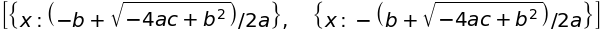

In [39]:
expr = a * x * x + b * x + c
solve(expr, x, dict=True) # выражаем одну переменную через другие, в качестве аргумента передаем
# ту переменную, которую хотим выразить

In [40]:
s, u, t, a = symbols('s, u, t, a')

In [41]:
expr = u * t + 0.5 * a * t * t - s
t_expr = solve(expr, t, dict=True)
print(t_expr)

[{t: (-u + sqrt(2.0*a*s + u**2))/a}, {t: -(u + sqrt(2.0*a*s + u**2))/a}]


Solving a System of Linear Equations

In [42]:
x = Symbol('x')
y = Symbol('y')
expr1 = 2 * x + 3 * y - 6
expr2 = 3 * x + 2 * y - 12
solve((expr1, expr2), dict=True)#use a tuple to add a system of expressions to the function

The solution check

In [43]:
soln = solve((expr1, expr2), dict=True)
soln = soln[0]
expr1.subs({x:soln[x], y:soln[y]}) == expr2.subs({x:soln[x], y:soln[y]})

True